# Deep Learning Lab 4
### Identifying Images From the CIFAR-10 Dataset Using ANNs

### By Sravanth Chowdary Potluri CS20B1006

Implement the ANN for classifying the images from CIFAR-10 dataset. 
Steps to be followed are as follows -
- Flatten the input image dimensions to 1D (width pixels x height pixels)
- Normalize the image pixel values (divide by 255)
- One-Hot Encode the categorical column
- Build a model architecture (Sequential) with Dense layers(Fully connected layers)
- Train the model and make predictions

In [1]:
# importing the required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2024-02-28 16:13:16.225644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 16:13:18.001990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/lib64/openmpi:/apps/gcc/mpi/openmpi/3.0.0/lib64:/apps/gcc/mpi/openmpi/3.0.0/lib64/openmpi:/apps/gcc/compiler/mpich/3.4.2/lib64:/apps/gcc/compiler/mpich/3.4.2/lib64/openmpi:/home/cs20b1006/miniconda3/envs/miscellaneous/lib/
2024-02-28 16:13:18.002322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [3]:
# Function to display random images
def display_random_images(dataset, labels, title):
  num_images = 5  # Number of images to display
  rand_idx = np.random.randint(0, len(dataset), num_images)
  images = dataset[rand_idx]
  true_labels = labels[rand_idx]

  plt.figure(figsize=(10, 5))
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i])
    plt.title(f"True Label: {true_labels[i]}")
    plt.axis('off')
  plt.suptitle(title)  
  plt.show()

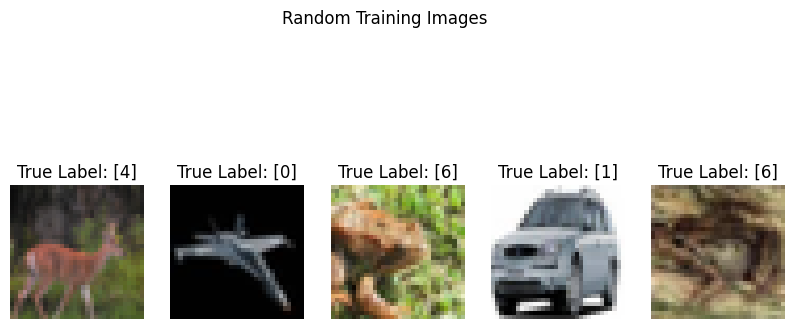

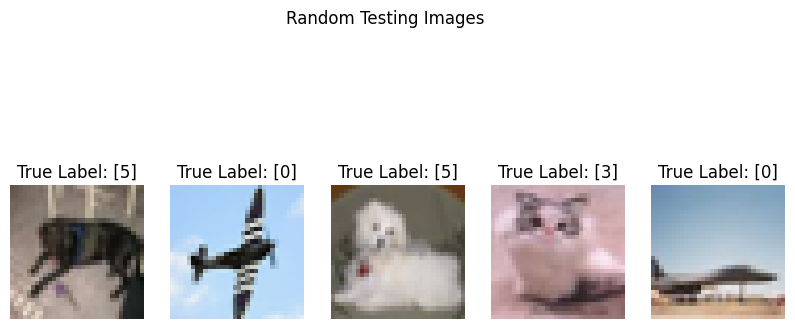

In [4]:
# Display random images from the training and testing sets
display_random_images(x_train, y_train, "Random Training Images") 
display_random_images(x_test, y_test, "Random Testing Images") 

In [5]:
# One-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Setting the model layers
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='leaky_relu'),
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax') # 10 output classes for CIFAR-10
])

2024-02-28 16:13:34.953354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 16:13:37.390834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15217 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2024-02-28 16:13:37.395864: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 4289 MB memory:  -> device: 1, name: Quadro P2000, pci bus id: 0000:c1:00.0, compute capability: 6.1


In [7]:
# Compiling the model with loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
# fitting the model
history = model.fit(x_train, y_train,
          epochs=50,
          batch_size=64,
          validation_data=(x_test, y_test))

Epoch 1/50


2024-02-28 16:13:49.922043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-28 16:13:49.941807: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f18a410e040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 16:13:49.941851: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2024-02-28 16:13:49.941860: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Quadro P2000, Compute Capability 6.1
2024-02-28 16:13:49.949784: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-28 16:13:50.635987: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most o

782/782 [==============================] - 19s 15ms/step - loss: 1.8826 - accuracy: 0.3143 - val_loss: 1.7047 - val_accuracy: 0.3801
Epoch 2/50
782/782 [==============================] - 11s 13ms/step - loss: 1.6778 - accuracy: 0.3972 - val_loss: 1.5906 - val_accuracy: 0.4337
Epoch 3/50
782/782 [==============================] - 11s 14ms/step - loss: 1.5930 - accuracy: 0.4276 - val_loss: 1.5805 - val_accuracy: 0.4355
Epoch 4/50
782/782 [==============================] - 11s 14ms/step - loss: 1.5294 - accuracy: 0.4523 - val_loss: 1.5237 - val_accuracy: 0.4561
Epoch 5/50
782/782 [==============================] - 11s 14ms/step - loss: 1.4856 - accuracy: 0.4685 - val_loss: 1.4776 - val_accuracy: 0.4786
Epoch 6/50
782/782 [==============================] - 10s 13ms/step - loss: 1.4492 - accuracy: 0.4821 - val_loss: 1.4768 - val_accuracy: 0.4702
Epoch 7/50
782/782 [==============================] - 11s 14ms/step - loss: 1.4164 - accuracy: 0.4940 - val_loss: 1.4616 - val_accuracy: 0.4790
Epo

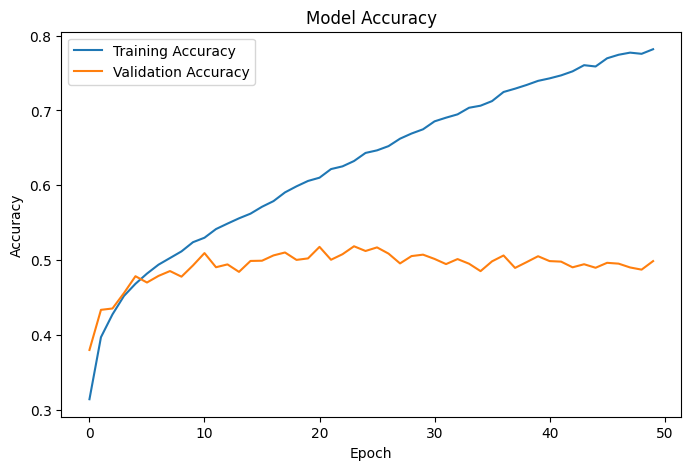

In [9]:
# Display the training graph 
plt.figure(figsize=(8, 5)) 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# displaying the final accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 2.2412 - accuracy: 0.4988
Test accuracy: 0.49880000948905945


1/1 [==============================] - 0s 30ms/step


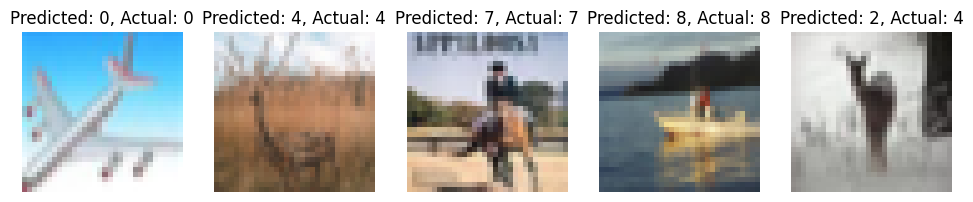

In [12]:
# Display random images with predicted and actual labels 
def display_predictions(images, labels):
  num_images = 5
  rand_idx = np.random.randint(0, len(images), num_images) # Random indices
  images = images[rand_idx]  # Select random images based on indices
  labels = labels[rand_idx]

  predictions = model.predict(images)

  plt.figure(figsize=(12, 6))
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i])
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(labels[i]) 
    title = f"Predicted: {pred_label}, Actual: {true_label}"
    plt.title(title)
    plt.axis('off')
  plt.show()

display_predictions(x_test, y_test)